# Forced Superposition: A 2-Qubit Quantum Circuit

This notebook demonstrates a quantum circuit with 2 qubits where:
- **Qubit 0** starts in the |+⟩ state (superposition of |0⟩ and |1⟩).
- **Qubit 1** starts in the |1⟩ state.
- The qubits are entangled so that measuring Qubit 0 always gives the opposite result of Qubit 1.
- We simulate this 1000 times and plot the results.

We’ll use **Qiskit**, a Python library for quantum computing, with the following gates:
- **H Gate**: Creates superposition.
- **X Gate**: Flips a qubit.
- **CX Gate**: Entangles qubits.

In [1]:
# Import necessary libraries
from qiskit import QuantumCircuit
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram
import matplotlib.pyplot as plt
from IPython.display import display

print("Libraries imported successfully!")

Libraries imported successfully!


## Step 1: Initialize the Quantum Circuit

We create a circuit with:
- 2 qubits (quantum bits).
- 2 classical bits (to store measurement results).

By default, qubits start in the |0⟩ state.

In [2]:
# Create a circuit with 2 qubits and 2 classical bits
qc = QuantumCircuit(2, 2)
print("Circuit created with 2 qubits and 2 classical bits.")

Circuit created with 2 qubits and 2 classical bits.


## Step 2: Superposition on Qubit 0

Apply the **Hadamard (H) gate** to Qubit 0:
- Transforms |0⟩ to |+⟩ = (|0⟩ + |1⟩)/√2.
- This puts Qubit 0 in a 50/50 superposition of |0⟩ and |1⟩.

Qubit 1 remains |0⟩ for now.

In [3]:
# Apply H gate to Qubit 0
qc.h(0)
print("H gate applied to Qubit 0.")

H gate applied to Qubit 0.


## Step 3: Set Qubit 1 to |1⟩

Apply the **X gate** to Qubit 1:
- Flips |0⟩ to |1⟩.

Now:
- Qubit 0 is in |+⟩ (superposition).
- Qubit 1 is in |1⟩.

In [4]:
# Apply X gate to Qubit 1
qc.x(1)
print("X gate applied to Qubit 1.")

X gate applied to Qubit 1.


## Step 4: Entangle the Qubits

Apply the **Controlled-NOT (CX) gate**:
- Qubit 0 is the control.
- Qubit 1 is the target.
- If Qubit 0 is |1⟩, Qubit 1 flips; if Qubit 0 is |0⟩, Qubit 1 stays.

Since Qubit 0 is in superposition, this entangles the qubits into (|01⟩ + |10⟩)/√2, meaning their outcomes will be opposite.

In [5]:
# Apply CX gate (Qubit 0 controls Qubit 1)
qc.cx(0, 1)
print("CX gate applied to entangle Qubit 0 and Qubit 1.")

CX gate applied to entangle Qubit 0 and Qubit 1.


## Step 5: Measure the Qubits

Measure both qubits and store results in classical bits:
- Qubit 0 → Classical bit 0.
- Qubit 1 → Classical bit 1.

Due to entanglement, we expect only '01' (Q0=0, Q1=1) or '10' (Q0=1, Q1=0).

In [6]:
# Measure both qubits
qc.measure([0, 1], [0, 1])
print("Measurement added to the circuit.")

Measurement added to the circuit.


## Step 6: Visualize the Circuit

Before simulating, let’s see the circuit structure:
- Shows qubits, gates (H, X, CX), and measurements.
- Helps verify our design.

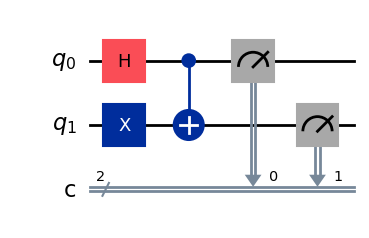

In [7]:
# Display the circuit diagram
circuit_diagram = qc.draw(output='mpl')  # 'mpl' uses matplotlib for a nice diagram
display(circuit_diagram)

## Step 7: Simulate the Circuit

Use the **AerSimulator** to run the circuit 1000 times (shots):
- Simulates quantum behavior on a classical computer.
- Counts how often each outcome ('01' or '10') occurs.

In [8]:
# Simulate the circuit with 1000 shots
simulator = AerSimulator()
job = simulator.run(qc, shots=1000)
result = job.result()
counts = result.get_counts()
print("Simulation completed. Counts:", counts)

Simulation completed. Counts: {'01': 496, '10': 504}


## Step 8: Visualize the Results

Plot a histogram of the measurement counts:
- Expect ~500 counts each for '01' and '10'.
- Confirms Qubit 0 and Qubit 1 are always opposite.

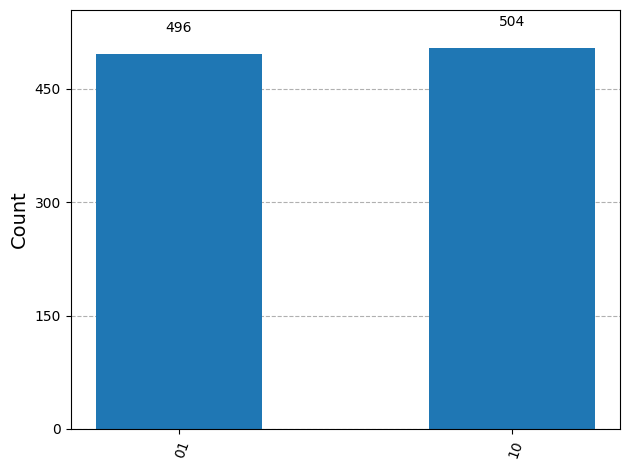

In [9]:
# Plot and display the histogram
fig = plot_histogram(counts)
display(fig)